In [1]:
##Q2. (40 pts) Support Vector Machines (SVM) are classifiers that aim to maximize the margin separating
##classes. In addition to linear classification, SVMs can also be used in non-linear classification by using
##kernel functions. In this case, instances are mapped to a high-dimensional space and separated using
##one or more hyperplanes.

In [2]:
import pandas as pd

#read csv
df = pd.read_csv('q2_data.csv')

In [3]:
print df.head()

      F1    F2  target
0 -0.881 -6.24     0.0
1  1.540  4.19     0.0
2 -1.130  4.92     0.0
3 -0.578 -1.93     1.0
4 -2.820 -4.98     0.0


In [4]:
print df.describe()

                F1           F2       target
count  5000.000000  5000.000000  5000.000000
mean     -0.027232     0.032467     0.280800
std       2.106079     3.975351     0.449435
min      -6.940000   -14.600000     0.000000
25%      -1.450000    -2.570000     0.000000
50%      -0.077850    -0.054600     0.000000
75%       1.420000     2.750000     1.000000
max       7.990000    13.600000     1.000000


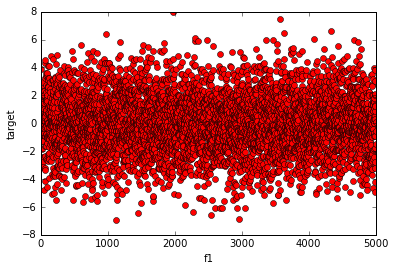

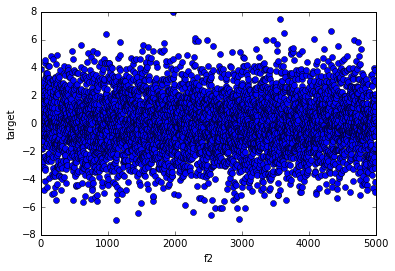

In [5]:
###a) Plot the dataset q2_data.csv and indicate whether you think the two dataset classes are linearly
###separable. Include the plot in your answer. (5 pts)
### a)Find out what this relationship looks like by plotting a 2-D graph of the two features. You can use
###   Python’s matplotlib for this task or any other plotting tool of your choice. Include the plot in your
###   answer. (5 pts)
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(df['F1'], 'ro')
plt.xlabel('f1')
plt.ylabel('target')
plt.show()
plt.plot(df['F1'], 'bo')
plt.xlabel('f2')
plt.ylabel('target')
plt.show()

In [5]:
# data is not lineraly separable

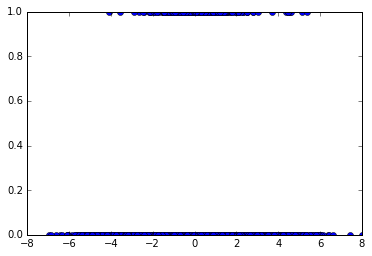

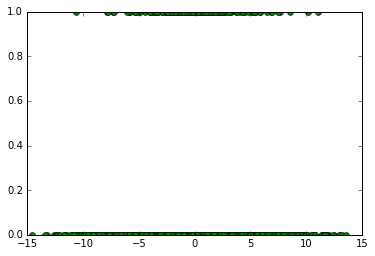

In [6]:
plt.plot(df['F1'], df['target'], 'bo')
plt.show()
plt.plot(df['F2'], df['target'], 'go')
plt.show()

In [7]:
###b) Using scikit-learn, fit an SVM model with a linear kernel to the dataset and evaluate its performance
###(accuracy) with 10-fold cross-validation. You should report performance using the accuracy measure,
###averaged across all cross-validation runs. Include your source code. (10 pts)
from sklearn import svm
clf = svm.SVC(kernel='linear')
from sklearn import cross_validation
features = ['F1', 'F2']
scores = cross_validation.cross_val_score(clf, df[features], df['target'], cv=10)
print scores
print ("#############################################################################################")
print ("scores accuracy is = ", scores.mean(), "with two standard deviation is =", scores.std() * 2)
print ('#############################################################################################')

[ 0.71856287  0.71856287  0.71856287  0.71856287  0.72        0.72
  0.71943888  0.71943888  0.71943888  0.71943888]
#############################################################################################
('scores accuracy is = ', 0.71920070080280318, 'with two standard deviation is =', 0.0011192787489608209)
#############################################################################################


In [8]:
###c) Now, fit an SVM model with a non-linear kernel to the dataset and evaluate its performance
###(accuracy) with 10-fold cross-validation. You should report performance using the accuracy measure,
###averaged across all cross-validation runs. Include your source code. (10 pts)

In [9]:
poly_clf = svm.SVC(kernel='rbf')
scores = cross_validation.cross_val_score(poly_clf, df[features], df['target'], cv=10)
print scores
print ("#############################################################################################")
print ("scores accuracy is = ", scores.mean(), "with two standard deviation is =", scores.std() * 2)
print ('#############################################################################################')

[ 0.96606786  0.97005988  0.96407186  0.96606786  0.972       0.966
  0.96793587  0.96993988  0.9759519   0.97795591]
#############################################################################################
('scores accuracy is = ', 0.96960510322041293, 'with two standard deviation is =', 0.0086601698231273967)
#############################################################################################


In [10]:
###d) Fit a Random Forest model to the q2_data.csv dataset and discuss why you think it performs better
###or worse than SVM (with linear and non-linear kernel), and how the number of trees in the forest
###affect the performance results. Include your source code. (15 pts)

# Import the random forest package
from sklearn.ensemble import RandomForestClassifier

def score_ntrees(n, x_train, y_train, x_test, y_test):
    # Create the random forest object which will include all the parameters
    # for the fit The number of trees in the forest.
    forest = RandomForestClassifier(n_estimators = n)
    # Fit the training data to create the decision trees
    forest = forest.fit(x_train, y_train)
    # Take the same decision trees and run it on the test data
    score = forest.score(x_test, y_test)
    return score

x_train, x_test, y_train, y_test = cross_validation.train_test_split(df[features], df[['target']], test_size=0.3, random_state=0)
for i in range(10, 101, 10):
    print i, score_ntrees(i, x_train, y_train, x_test, y_test)

10 0.979333333333
20

C:\Users\ravindra\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\ravindra\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 0.98
30 0.98
40

C:\Users\ravindra\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\ravindra\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 0.98
50

C:\Users\ravindra\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 0.98
60

C:\Users\ravindra\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 0.98
70

C:\Users\ravindra\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 0.98
80

C:\Users\ravindra\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 0.98
90

C:\Users\ravindra\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 0.98
100

C:\Users\ravindra\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 0.98


In [11]:
### SVM with rbf kernel gave 0.97 accuracy
### Random forest has 0.98 accuracy and doesn't increase with number of trees.
### I would say both have almost equal accuracy(~0.01 difference negligible).